In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "../../../lib"));

In [2]:
using NaCsCalc.Trap

In [3]:
const N_A = 6.02214076e23
const m_Yb171 = 171e-3 / N_A

const ω2_a1 = 2π * 680e3
const ω2_a2 = 2π * 1.18e6
const ω2_r1_1 = 2π * 2.555e6
const ω2_r1_2 = 2π * 2.651e6
const ω2_r2_1 = 2π * 2.848e6
const ω2_r2_2 = 2π * 2.934e6

const k_355 = 2π / 355e-9
const k_435 = 2π / 435e-9

const η355_2_r1_1 = Trap.η(m_Yb171, ω2_r1_1 / 2π, k_355 * 2) / sqrt(2)
const η355_2_r1_2 = Trap.η(m_Yb171, ω2_r1_2 / 2π, k_355 * 2) / sqrt(2)
@show η355_2_r1_1, η355_2_r1_2

const η435_2_a1 = Trap.η(m_Yb171, ω2_a1 / 2π, k_435 / sqrt(2)) / sqrt(2)
const η435_2_a2 = Trap.η(m_Yb171, ω2_a2 / 2π, k_435 / sqrt(2)) / sqrt(2)
const η435_2_r1_1 = Trap.η(m_Yb171, ω2_r1_1 / 2π, k_435 / sqrt(2)) / sqrt(2)
const η435_2_r1_2 = Trap.η(m_Yb171, ω2_r1_2 / 2π, k_435 / sqrt(2)) / sqrt(2)
@show η435_2_a1, η435_2_a2, η435_2_r1_1, η435_2_r1_2

(η355_2_r1_1, η355_2_r1_2) = (0.08512979778626215, 0.08357419270359065)
(η435_2_a1, η435_2_a2, η435_2_r1_1, η435_2_r1_2) = (0.0476120301867742, 0.03614349561223189, 0.02456267740227064, 0.024113835436183426)


(0.0476120301867742, 0.03614349561223189, 0.02456267740227064, 0.024113835436183426)

In [4]:
using OrdinaryDiffEq

In [5]:
include("motion-nd.jl")

evolve (generic function with 1 method)

In [6]:
const ωs2_355 = (ω2_r1_1, ω2_r1_2)
const ηs2_355 = (η355_2_r1_1, η355_2_r1_2)

const ωs2_435 = (ω2_a1, ω2_a2, ω2_r1_1, ω2_r1_2)
const ηs2_435 = (η435_2_a1, η435_2_a2, η435_2_r1_1, η435_2_r1_2)

(0.0476120301867742, 0.03614349561223189, 0.02456267740227064, 0.024113835436183426)

In [7]:
function blackman_profile(len)
    function cb(t)
        if t > len
            return 0.0
        end
        θ = t * (2pi / len) - pi
        return evalpoly(cos(θ), (0.34, 0.5, 0.16))
    end
end
function scale_profile(a)
    function cb(t)
        return a
    end
end

scale_profile (generic function with 1 method)

In [8]:
ts1, ψs1 = @time evolve(2π * 0, ωs2_355, ηs2_355,
                        spindown(SpinBasis(1//2)), (5, 5),
                        2π * 250e3, range(0, 30e-6, 20000), alg=Vern9());

N = 20
  3.732838 seconds (21.45 M allocations: 1.235 GiB, 14.59% gc time, 95.97% compilation time: <1% of which was recompilation)


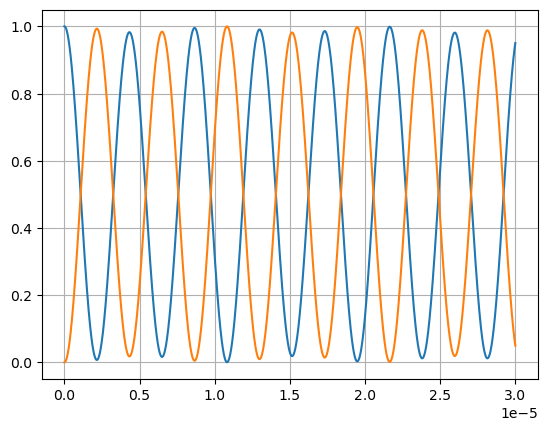

In [9]:
rhos1 = [ptrace(ψ, [1]) for ψ in ψs1];
# rhos2 = [ptrace(ψ, [1]) for ψ in ψs2];
plot(ts1, [abs(rho.data[2, 2]) for rho in rhos1])
plot(ts1, [abs(rho.data[1, 1]) for rho in rhos1])
# plot(ts2, [abs(rho.data[2, 2]) for rho in rhos2])
# plot(ts2, [abs(rho.data[1, 1]) for rho in rhos2])
grid()

In [21]:
ts2, ψs2 = @time evolve(2π * 202e3, ωs2_435, ηs2_435,
                        (spindown(SpinBasis(1//2)) + spinup(SpinBasis(1//2))) / 2, (10, 5, 3, 3),
                        2π * 22e3, range(0, 100e-6, 2001),
                        alg=Vern9(), Erange=7,
                        Ωprofile=blackman_profile(25e-6 / 0.43));

N = 2814
772.969939 seconds (613.67 k allocations: 2.392 GiB, 0.22% gc time)


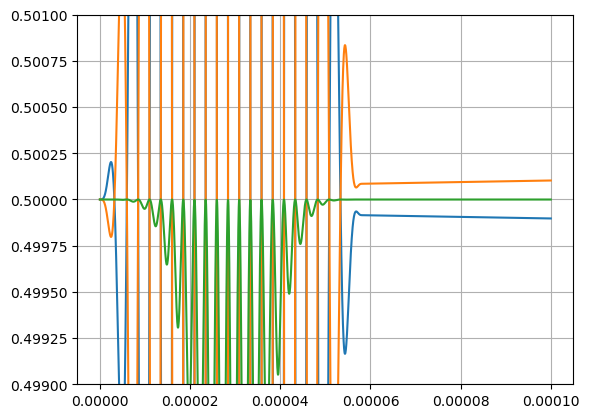

(0.499, 0.501)

In [23]:
rhos2 = [ptrace(ψ, [1]) for ψ in ψs2];
plot(ts2, [abs(rho.data[2, 2]) for rho in rhos2])
plot(ts2, [abs(rho.data[1, 1]) for rho in rhos2])
plot(ts2, [abs(rho.data[1, 2]) for rho in rhos2])
grid()
ylim([0.499, 0.501])

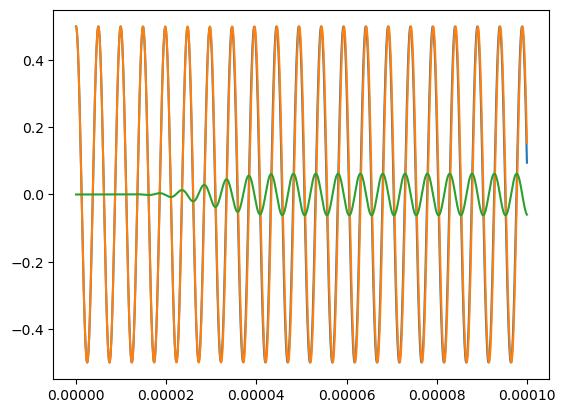

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0xfffe04202d50>

In [28]:
plot(ts2, [real(rho.data[1, 2]) for rho in rhos2])
plot(ts2, 0.5 .* cos.(ts2 .* 2π * 202e3))
plot(ts2, [real(rho.data[1, 2]) for rho in rhos2] .- 0.5 .* cos.(ts2 .* 2π * 202e3))

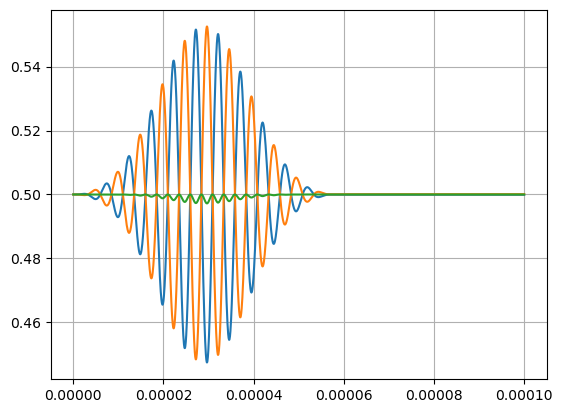

In [16]:
rhos2 = [ptrace(ψ, [1]) for ψ in ψs2];
plot(ts2, [abs(rho.data[2, 2]) for rho in rhos2])
plot(ts2, [abs(rho.data[1, 1]) for rho in rhos2])
plot(ts2, [abs(rho.data[1, 2]) for rho in rhos2])
grid()

In [29]:
ts3, ψs3 = @time evolve(2π * 202e3, ωs2_435, ηs2_435,
                        (spindown(SpinBasis(1//2)) + spinup(SpinBasis(1//2))) / 2, (0, 0, 0, 0),
                        2π * 22e3, range(0, 100e-6, 2001),
                        alg=Vern9(), Erange=7,
                        Ωprofile=blackman_profile(25e-6 / 0.43));

N = 4
  0.024320 seconds (27.86 k allocations: 2.964 MiB)


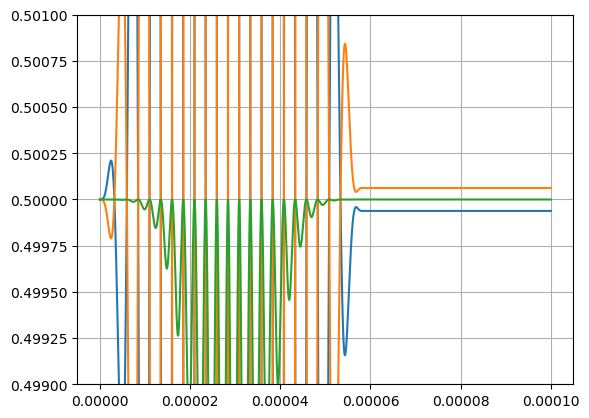

(0.499, 0.501)

In [30]:
rhos3 = [ptrace(ψ, [1]) for ψ in ψs3];
plot(ts3, [abs(rho.data[2, 2]) for rho in rhos3])
plot(ts3, [abs(rho.data[1, 1]) for rho in rhos3])
plot(ts3, [abs(rho.data[1, 2]) for rho in rhos3])
grid()
ylim([0.499, 0.501])

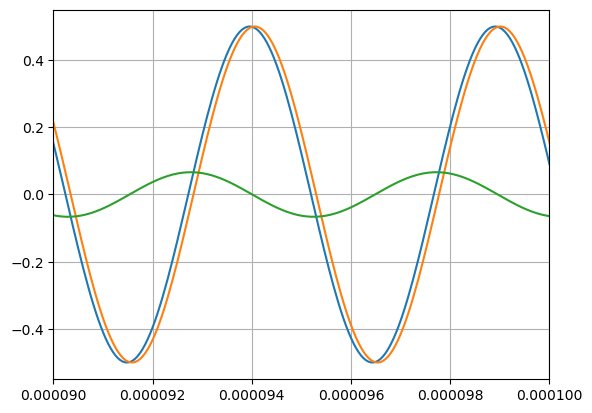

(9.0e-5, 0.0001)

In [33]:
plot(ts3, [real(rho.data[1, 2]) for rho in rhos3])
plot(ts3, 0.5 .* cos.(ts3 .* 2π * 202e3))
plot(ts3, [real(rho.data[1, 2]) for rho in rhos3] .- 0.5 .* cos.(ts3 .* 2π * 202e3))
grid()
xlim([90e-6, 100e-6])

In [11]:
ts2, ψs2 = @time evolve(2π * 202e3, ωs2_435, ηs2_435,
                        spindown(SpinBasis(1//2)), (0, 0, 0, 0),
                        2π * 22e3, range(0, 100e-6, 2001),
                        alg=Vern9(), Erange=7,
                        Ωprofile=blackman_profile(25e-6 / 0.43));

N = 4
  0.005180 seconds (26.77 k allocations: 2.848 MiB)


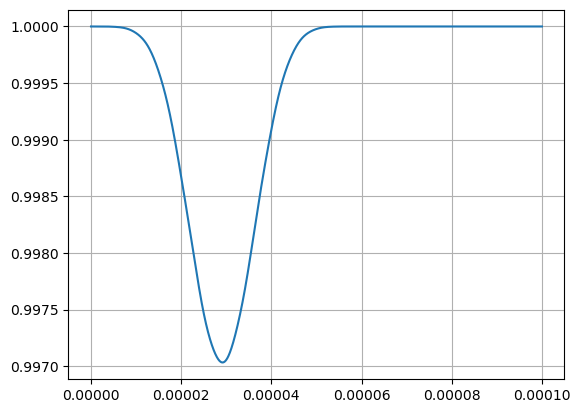

In [12]:
rhos2 = [ptrace(ψ, [1]) for ψ in ψs2];
plot(ts2, [abs(rho.data[2, 2]) for rho in rhos2])
# plot(ts2, [abs(rho.data[1, 1]) for rho in rhos2])
grid()